In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_data.csv")

# Drop duration
#df.drop('duration', axis=1, inplace=True)
df.drop('emp.var.rate', axis = 1, inplace= True)
#df.drop('pdays', axis = 1, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [3]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
numerical = df.select_dtypes(include=['int64', 'float64']).columns

for x in numerical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [4]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [5]:
df.loc[(df.education == 'basic.4y') | (df.education == 'basic.6y') | (df.education == 'basic.9y'),
       'education'] = 'basic'
df.education.value_counts()

import pandas as pd


# Mapping for job clubbing
job_mapping = {
    'housemaid': 'blue-collar',
    'services': 'blue-collar',
    'admin.': 'white-collar',
    'blue-collar': 'blue-collar',
    'technician': 'blue-collar',
    'retired': 'retired',
    'management': 'white-collar',
    'unemployed': 'unemployed',
    'self-employed': 'self-employed',
    'unknown': 'unknown',
    'entrepreneur': 'self-employed',
    'student': 'student'
}

# Create a new column 'job_category' based on the mapping
df['job'] = df['job'].map(job_mapping)

# Display the DataFrame with the new 'job_category' column
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,blue-collar,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,blue-collar,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,blue-collar,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,blue-collar,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


In [6]:
# Dropping records with unknowns in job and marital as they are small in number 

import pandas as pd

# Assuming your DataFrame is named df and the columns with 'unknown' values are 'col1', 'col2', 'col3'
columns_with_unknown = ['job', 'marital']

# Create a boolean mask for rows with 'unknown' values in any of the specified columns
filter = df[columns_with_unknown].apply(lambda col: col != 'unknown').all(axis=1)

# Filter the DataFrame to include only rows where the condition is True
df_filtered = df[filter]


# Assuming df2 is your DataFrame
target_column = 'default'

# Filter out instances with 'yes' as there were only 3 records with default = yes
df_filtered = df_filtered[df_filtered[target_column].isin(['no', 'unknown'])]

# Display the filtered DataFrame
df_filtered 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,blue-collar,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,blue-collar,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,blue-collar,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,blue-collar,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


In [7]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df_filtered.copy()
df2['job'].replace(['white-collar', 'self-employed', 'retired', 'blue-collar', 'student', 'unemployed', 'unknown'],
                  [1, 2, 3, 4, 5, 6, 7],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace= True)
df2['education'].replace(['university.degree', 'professional.course', 'high.school', 'basic',
'illiterate', 'unknown'], [1, 2, 3, 4, 5, 6], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)
df2['loan'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)
df2['housing'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)

# Binary encoding

df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
df2['default'] = df2['default'].map({'no': 1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 1, 'telephone': 0})


df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,1,4,1,2,2,0,5,1,261,1,999,0,1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,3,0,2,2,0,5,1,149,1,999,0,1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,3,1,1,2,0,5,1,226,1,999,0,1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,4,1,2,2,0,5,1,151,1,999,0,1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,3,1,2,1,0,5,1,307,1,999,0,1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3,1,2,1,1,2,1,11,5,334,1,999,0,1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,2,1,2,2,1,11,5,383,1,999,0,1,94.767,-50.8,1.028,4963.6,0
41185,56,3,1,1,1,1,2,1,11,5,189,2,999,0,1,94.767,-50.8,1.028,4963.6,0
41186,44,4,1,2,1,2,2,1,11,5,442,1,999,0,1,94.767,-50.8,1.028,4963.6,1


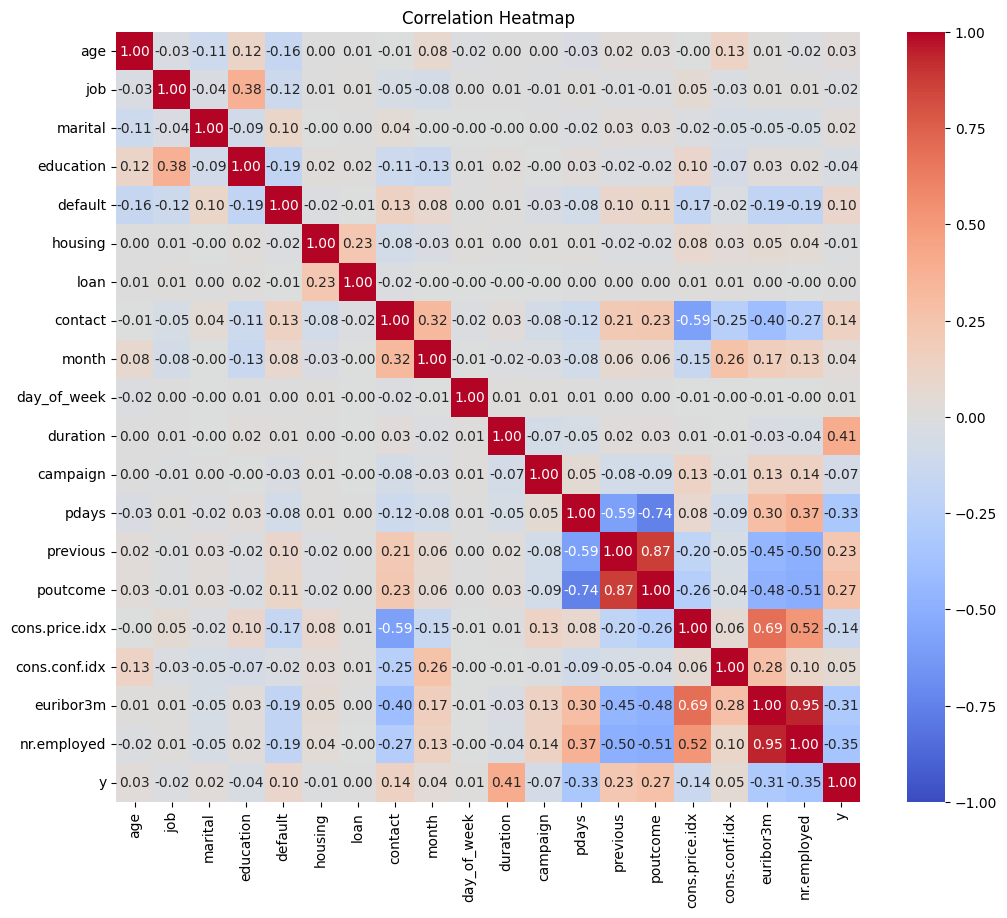

In [8]:
# Correlation analysis

# Q: Should we do Feature selection via correlation analysis?
# Ans: Need to discuss but if we do go ahead with this then
# Check if we need to set a threshold for correlation coeff of say 0.9 and drop columns that have >0.9

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2_standardized is your standardized DataFrame
# You may want to adjust the size of the heatmap based on your needs
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()



In [9]:
# Correlation feature selection

import pandas as pd

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Set the correlation threshold
corr_threshold = 0.9

# Create a mask to identify highly correlated features
mask = (corr_matrix.abs() > corr_threshold) & (corr_matrix.abs() < 1.0)

# Identify pairs of highly correlated features
correlated_features = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        correlated_features.add(col)
        correlated_features.update(correlated_cols)

# Remove one feature from each correlated pair
features_to_drop = list(correlated_features)
df_dropped = df2.drop(columns=features_to_drop)
#df_dropped = df_dropped.drop('poutcome', axis=1)
#df_dropped = df_dropped.drop('contact', axis=1)


# Display the filtered DataFrame
print("Original DataFrame shape:", df2.shape)
print("Filtered DataFrame shape:", df_dropped.shape)

for col in df_dropped.columns:
    print(col)

Original DataFrame shape: (40784, 20)
Filtered DataFrame shape: (40784, 18)
age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
cons.price.idx
cons.conf.idx
y


In [10]:
# Doing standardization using Z scores to handle outliers as seen in EDA code
def standardize_dataframe(df, columns_to_standardize):
    # Calculate mean and standard deviation for each specified column
    means = df[columns_to_standardize].mean()
    stds = df[columns_to_standardize].std()

    # Standardization formula: (X - mean) / std
    df_standardized = df.copy()
    df_standardized[columns_to_standardize] = (df[columns_to_standardize] - means) / stds

    return df_standardized

# Example usage
# Assuming df2 is your DataFrame
columns_to_standardize = ['age', 'campaign', 'pdays', 'duration', 'previous', 'cons.price.idx', 'cons.conf.idx']
df2_standardized = standardize_dataframe(df_dropped, columns_to_standardize)

# Display the original and standardized DataFrames
print(df_dropped.columns)
df2_standardized.tail()


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
41183,3.174431,3,1,2,1,1,2,1,11,5,0.291808,-0.565787,0.194725,-0.349313,1,2.060543,-2.222681,1
41184,0.578849,4,1,2,1,2,2,1,11,5,0.480796,-0.565787,0.194725,-0.349313,1,2.060543,-2.222681,0
41185,1.540175,3,1,1,1,1,2,1,11,5,-0.267442,-0.204539,0.194725,-0.349313,1,2.060543,-2.222681,0
41186,0.386584,4,1,2,1,2,2,1,11,5,0.708353,-0.565787,0.194725,-0.349313,1,2.060543,-2.222681,1
41187,3.270563,3,1,2,1,1,2,1,11,5,-0.074597,0.156708,0.194725,1.671449,2,2.060543,-2.222681,0


Balanced accuracy is  0.7213499670400262
Confusion Matrix is 
 [[6400  874]
 [ 386  497]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7274
         1.0       0.36      0.56      0.44       883

    accuracy                           0.85      8157
   macro avg       0.65      0.72      0.68      8157
weighted avg       0.88      0.85      0.86      8157



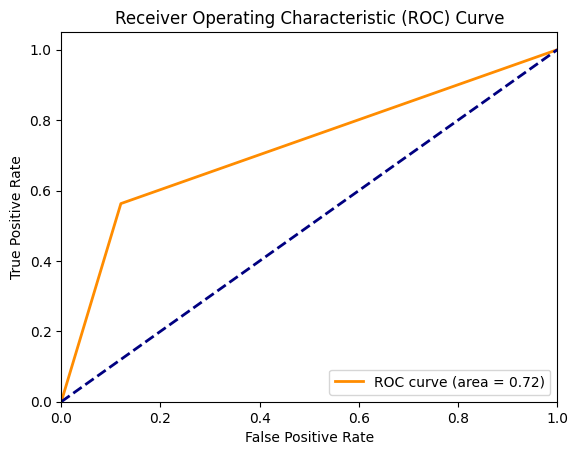

In [63]:
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn import metrics

class GaussianNaiveBayes:

    def __init__(self, train, test) -> None:
        self.train_df = train
        self.test_df = test
    
    def datasetReader(self):
        train_df,test_df=np.array(self.train_df,dtype=np.float64),np.array(self.test_df,dtype=np.float64)
        self.X_train,self.y_train = train_df[:, :-1], train_df[:, -1]
        self.X_test,self.y_test = test_df[:, :-1], test_df[:, -1]
        return self.X_train, self.y_train, self.X_test, self.y_test

    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean,std)
        return dist
    
    def probability(self, X, dist, prior):
        prob = prior
        count = 0
        for each in dist:
          prob = prob * each.pdf(X[count])
          count +=1
        return prob
    
    def fit(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader()
        
        self.X0_train = self.X_train[self.y_train == 0] 
        self.X1_train = self.X_train[self.y_train == 1]
        
        self.prior_1 = len(self.X1_train)/ len(self.X_train)
        self.prior_0 = len(self.X0_train)/ len(self.X_train)

        self.dist0 = []
        self.dist1 = []

        for i in range(17):
          self.dist0.append(self.fitDistribution(self.X0_train[:,i]))
          self.dist1.append(self.fitDistribution(self.X1_train[:,i]))

        actual = self.y_test
        pred = self.predict()

        print('Balanced accuracy is ', metrics.balanced_accuracy_score(actual, pred))
        print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
        print('\nClassification report:\n', classification_report(actual, pred))


        fpr, tpr, _ = roc_curve(actual, pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()


    def predict(self):
        pred = []
        for sample in self.X_test:
            py0 = self.probability(sample, self.dist0, self.prior_0)
            py1 = self.probability(sample, self.dist1, self.prior_1)
            
            y_predict = np.argmax([py0,py1])
            pred.append(y_predict)      
        return pred   

# Use this as the dataset for Discrete Naive Bayes
X = df_dropped.iloc[:, df_dropped.columns!='y']
y = df_dropped.iloc[:, df_dropped.columns=='y']

# Change smote flag if needed
smote_flag = True
if smote_flag == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=18)
    smote = SMOTE(random_state=42) #1
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=18)


train_df = pd.merge(X_train_resampled, y_train_resampled, left_index=True, right_index=True)
train_df = np.array(train_df, dtype=np.float64)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df = np.array(test_df, dtype=np.float64)


gnb = GaussianNaiveBayes(train = train_df, test = test_df)
gnb.fit()


Balanced accuracy is  0.7237603258101789
Confusion Matrix is 
 [[6390  872]
 [ 387  508]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7262
         1.0       0.37      0.57      0.45       895

    accuracy                           0.85      8157
   macro avg       0.66      0.72      0.68      8157
weighted avg       0.88      0.85      0.86      8157


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 42110 - 4742 = 37368


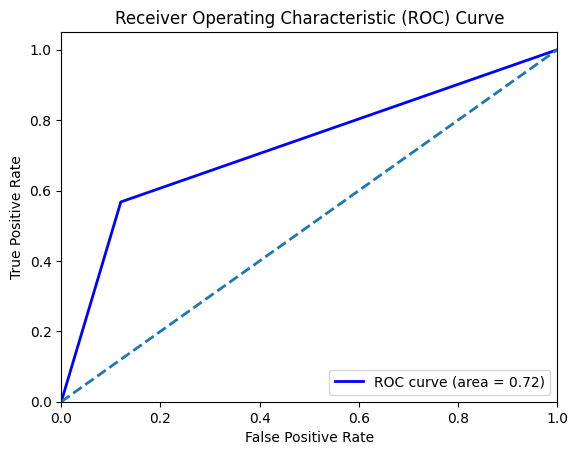

In [107]:
# KFold

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt

class KFGaussianNaiveBayes:

    def __init__(self, train, test) -> None:
        self.train_df = train
        self.test_df = test
    
    def split_data(self):
        train_df, test_df = np.array(self.train_df, dtype=np.float64), np.array(self.test_df, dtype=np.float64)
        self.X_train, self.y_train = train_df[:, :-1], train_df[:, -1]
        self.X_test, self.y_test = test_df[:, :-1], test_df[:, -1]
        return self.X_train, self.y_train, self.X_test, self.y_test

    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        return dist
    
    def probability(self, X, dist, prior):
        prob = prior
        count = 0
        for each in dist:
          prob = prob * each.pdf(X[count])
          count += 1
        return prob
    
    def fit(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.split_data()
        
        self.X0_train = self.X_train[self.y_train == 0] 
        self.X1_train = self.X_train[self.y_train == 1]
        
        self.prior_1 = len(self.X1_train)/ len(self.X_train)
        self.prior_0 = len(self.X0_train)/ len(self.X_train)

        self.dist0 = []
        self.dist1 = []

        for i in range(self.X_train.shape[1]):
          self.dist0.append(self.fitDistribution(self.X0_train[:,i]))
          self.dist1.append(self.fitDistribution(self.X1_train[:,i]))

        actual = self.y_test
        pred = self.predict()

        print('Balanced accuracy is ', metrics.balanced_accuracy_score(actual, pred))
        print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
        print('\nClassification report:\n', classification_report(actual, pred))

        mat = metrics.confusion_matrix(actual, pred)
        TP = mat[1, 1]
        FP = mat[0, 1]
        TN = mat[0, 0]
        FN = mat[1, 0]

        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5

        # Calculate Total Cost (TC) and Total Benefit (TB)
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN) 

        print("\nLet's assume a small cost analysis where we have the following")
        print(f"\n Costs and benefits: Cfp = {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"\n Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {TB - TC}")

        fpr, tpr, _ = roc_curve(actual, pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()
    
    def fit_kfold(self, apply_smote):
        self.X_train, self.y_train, self.X_test, self.y_test = self.split_data()

        kf = KFold(n_splits=5, shuffle=True, random_state=11)
        fold_count = 1

        for train_idx, test_idx in kf.split(self.X_train):
            print(f"Fold {fold_count}:")

            X_train_fold, X_val_fold = self.X_train[train_idx], self.X_train[test_idx]
            y_train_fold, y_val_fold = self.y_train[train_idx], self.y_train[test_idx]

            if apply_smote:
                sm = SMOTE(random_state=42)
                X_train_resampled, y_train_resampled = sm.fit_resample(X_train_fold, y_train_fold)
            else:
                X_train_resampled, y_train_resampled = X_train_fold, y_train_fold

            self.X0_train = X_train_resampled[y_train_resampled == 0]
            self.X1_train = X_train_resampled[y_train_resampled == 1]

            self.prior_1 = len(self.X1_train) / len(X_train_resampled)
            self.prior_0 = len(self.X0_train) / len(X_train_resampled)

            self.dist0 = [self.fitDistribution(self.X0_train[:, i]) for i in range(self.X_train.shape[1])]
            self.dist1 = [self.fitDistribution(self.X1_train[:, i]) for i in range(self.X_train.shape[1])]

            actual = y_val_fold
            pred = self.predict(X_val_fold)

            print('Balanced accuracy is ', metrics.balanced_accuracy_score(actual, pred))
            print('Confusion Matrix is \n', metrics.confusion_matrix(actual, pred))
            print('\nClassification report:\n', classification_report(actual, pred))

            mat = metrics.confusion_matrix(actual, pred)
            TP = mat[1, 1]
            FP = mat[0, 1]
            TN = mat[0, 0]
            FN = mat[1, 0]

            Cfp, Cfn, Btp, Btn = 1, 10, 20, 5

            # Calculate Total Cost (TC) and Total Benefit (TB)
            TC = (Cfp * FP) + (Cfn * FN)
            TB = (Btp * TP) + (Btn * TN)

            print("\nLet's assume a small cost analysis where we have the following")
            print(f"\n Costs and benefits: Cfp = {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
            print(f"\n Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {TB - TC}")

            fold_count += 1

            fpr, tpr, _ = roc_curve(actual, pred)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.figure()
            plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc='lower right')
            plt.show()


    def predict(self, X_val=None):
        if X_val is None:
            X_val = self.X_test

        pred = []
        for sample in X_val:
            py0 = self.probability(sample, self.dist0, self.prior_0)
            py1 = self.probability(sample, self.dist1, self.prior_1)

            y_predict = np.argmax([py0, py1])
            pred.append(y_predict)
        return pred
   

# Assuming df_dropped is defined before this code
X = df_dropped.iloc[:, df_dropped.columns!='y']
y = df_dropped.iloc[:, df_dropped.columns=='y']

# >>>> IMPORTANT <<<<
# This implementation is for the normal GNB fit (no KFold)
smote_flag = True
if smote_flag == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=11)
    smote = SMOTE(random_state=11) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=11)


train_df = pd.merge(X_train_resampled, y_train_resampled, left_index=True, right_index=True)
train_df = np.array(train_df, dtype=np.float64)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df = np.array(test_df, dtype=np.float64)


gnb = KFGaussianNaiveBayes(train = train_df, test = test_df)
gnb.fit()


Fold 1:
Balanced accuracy is  0.7446640604276418
Confusion Matrix is 
 [[5095  702]
 [ 284  445]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      5797
         1.0       0.39      0.61      0.47       729

    accuracy                           0.85      6526
   macro avg       0.67      0.74      0.69      6526
weighted avg       0.88      0.85      0.86      6526


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 34375 - 3542 = 30833


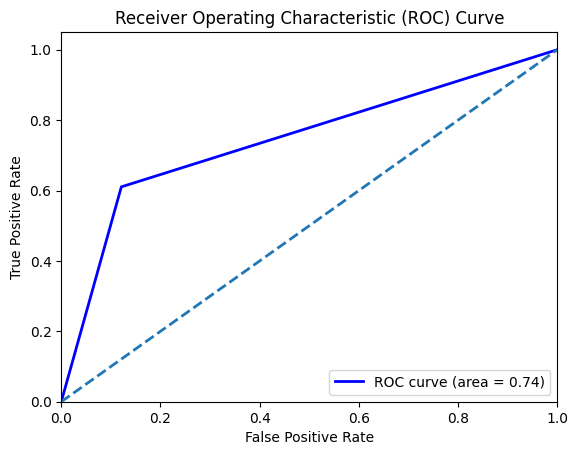

Fold 2:
Balanced accuracy is  0.7132485468972424
Confusion Matrix is 
 [[5062  747]
 [ 319  398]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      5809
         1.0       0.35      0.56      0.43       717

    accuracy                           0.84      6526
   macro avg       0.64      0.71      0.67      6526
weighted avg       0.88      0.84      0.85      6526


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 33270 - 3937 = 29333


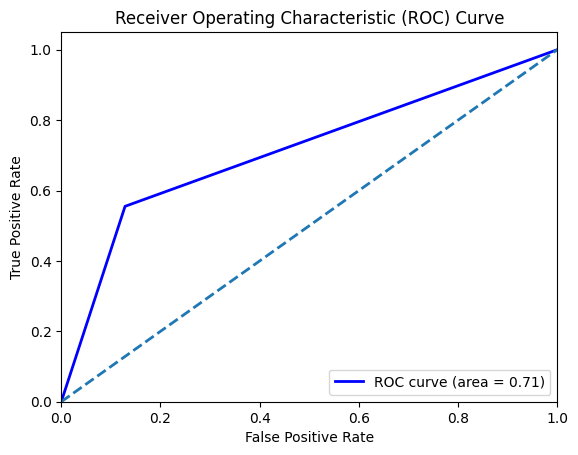

Fold 3:
Balanced accuracy is  0.7116492192732016
Confusion Matrix is 
 [[5082  708]
 [ 334  401]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5790
         1.0       0.36      0.55      0.43       735

    accuracy                           0.84      6525
   macro avg       0.65      0.71      0.67      6525
weighted avg       0.87      0.84      0.85      6525


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 33430 - 4048 = 29382


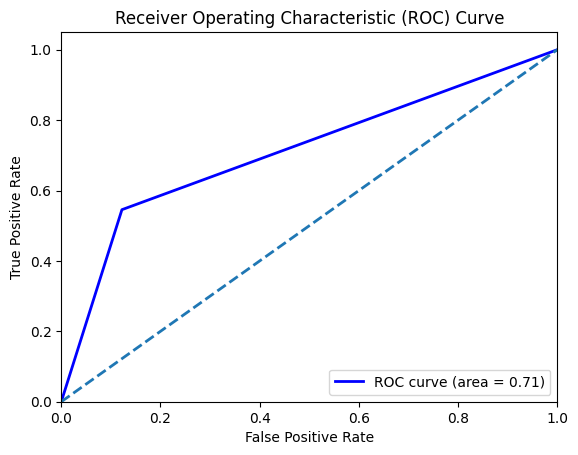

Fold 4:
Balanced accuracy is  0.7088892005610098
Confusion Matrix is 
 [[4999  751]
 [ 350  425]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      5750
         1.0       0.36      0.55      0.44       775

    accuracy                           0.83      6525
   macro avg       0.65      0.71      0.67      6525
weighted avg       0.87      0.83      0.85      6525


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 33495 - 4251 = 29244


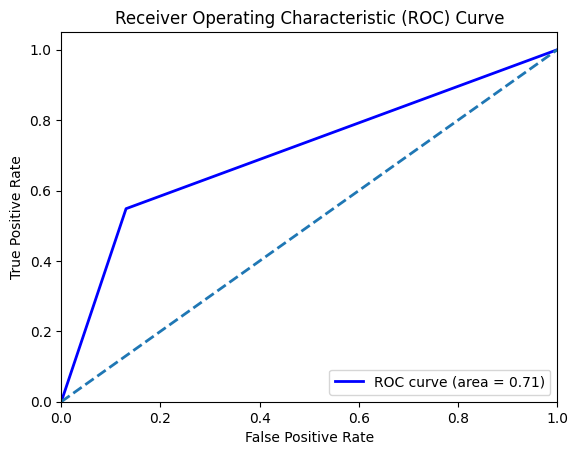

Fold 5:
Balanced accuracy is  0.7129733386157346
Confusion Matrix is 
 [[5062  720]
 [ 334  409]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5782
         1.0       0.36      0.55      0.44       743

    accuracy                           0.84      6525
   macro avg       0.65      0.71      0.67      6525
weighted avg       0.87      0.84      0.85      6525


Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 33490 - 4060 = 29430


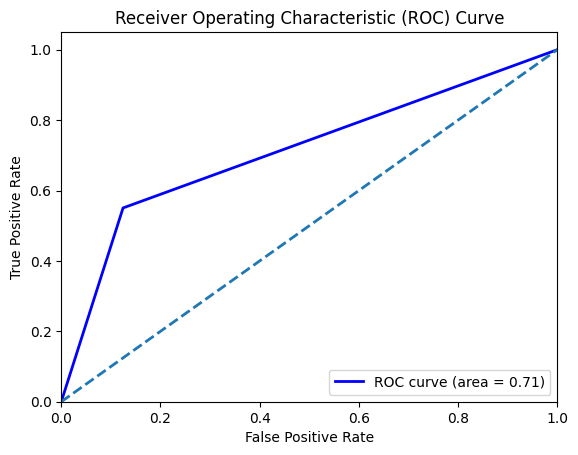

In [105]:
# This implementation is for KFold 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_df = np.array(train_df, dtype=np.float64)

test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df = np.array(test_df, dtype=np.float64)

gnb = KFGaussianNaiveBayes(train=train_df, test=test_df)
gnb.fit_kfold(apply_smote = True)
